In [1]:
import pickle
import pandas as pd
import numpy as np
import kaggle
import zipfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Task description
This jupyter notebook performs data analysis and visualization.

# Import raw data

In [2]:
# import nasa.csv into a pandas dataframe
df_nasa = pd.read_csv('../data/raw/nasa.csv')

print(f'df_nasa shape: {df_nasa.shape}')
print('Head of df_nasa:')
display(df_nasa.head(3))

df_nasa shape: (4687, 40)
Head of df_nasa:


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


In [3]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

# Data analysis

### Rename columns

In [4]:
# fix column names: replace each ' ' with '_'. 
df_nasa.columns = df_nasa.columns.str.strip().str.lower().str.replace(' ', '_', regex=False).str.replace('(', '_', regex=False).str.replace(')', '', regex=False)

print('Head of df_nasa:')
display(df_nasa.head(3))

Head of df_nasa:


,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,est_dia_in_feet_max,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist._astronomical,miss_dist._lunar,miss_dist._kilometers,miss_dist._miles,orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


### Target variable distribution

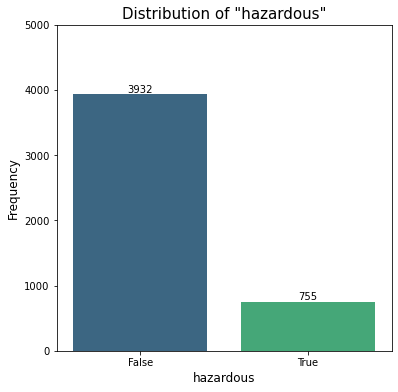

In [5]:
# barplot showing target variable distribution
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x = 'hazardous', data=df_nasa, palette="viridis")
plt.title('Distribution of "hazardous"', fontsize=15)
plt.xlabel('hazardous', size=12)
plt.ylabel('Frequency', size=12)
ax.bar_label(ax.containers[0])
plt.ylim((0, 5000))
plt.show()

### Check missing values

In [6]:
# missing values analysis
df_nasa.isnull().sum()

# data contains no missing values

neo_reference_id                0
name                            0
absolute_magnitude              0
est_dia_in_km_min               0
est_dia_in_km_max               0
est_dia_in_m_min                0
est_dia_in_m_max                0
est_dia_in_miles_min            0
est_dia_in_miles_max            0
est_dia_in_feet_min             0
est_dia_in_feet_max             0
close_approach_date             0
epoch_date_close_approach       0
relative_velocity_km_per_sec    0
relative_velocity_km_per_hr     0
miles_per_hour                  0
miss_dist._astronomical         0
miss_dist._lunar                0
miss_dist._kilometers           0
miss_dist._miles                0
orbiting_body                   0
orbit_id                        0
orbit_determination_date        0
orbit_uncertainity              0
minimum_orbit_intersection      0
jupiter_tisserand_invariant     0
epoch_osculation                0
eccentricity                    0
semi_major_axis                 0
inclination   

### Feature reduction

In [7]:
# get number of unique values per feature
print(df_nasa.nunique().sort_values(ascending=True))

# 'equinox' and 'orbiting_body' contain only one unique value so can be dropped

equinox                            1
orbiting_body                      1
hazardous                          2
orbit_uncertainity                10
orbit_id                         188
est_dia_in_km_min                269
absolute_magnitude               269
est_dia_in_feet_max              269
est_dia_in_feet_min              269
est_dia_in_miles_min             269
est_dia_in_m_max                 269
est_dia_in_m_min                 269
est_dia_in_km_max                269
est_dia_in_miles_max             269
epoch_osculation                 429
epoch_date_close_approach        777
close_approach_date              777
jupiter_tisserand_invariant     2495
orbit_determination_date        2680
minimum_orbit_intersection      3678
perihelion_time                 3692
perihelion_distance             3692
perihelion_arg                  3692
aphelion_dist                   3692
asc_node_longitude              3692
mean_anomaly                    3692
mean_motion                     3692
o

In [8]:
# check if columns 'name' and 'neo_reference_id' are equal
print(df_nasa['name'].equals(df_nasa['neo_reference_id']))

# since 'name' and 'neo_reference_id' are equal, they can be dropped

True


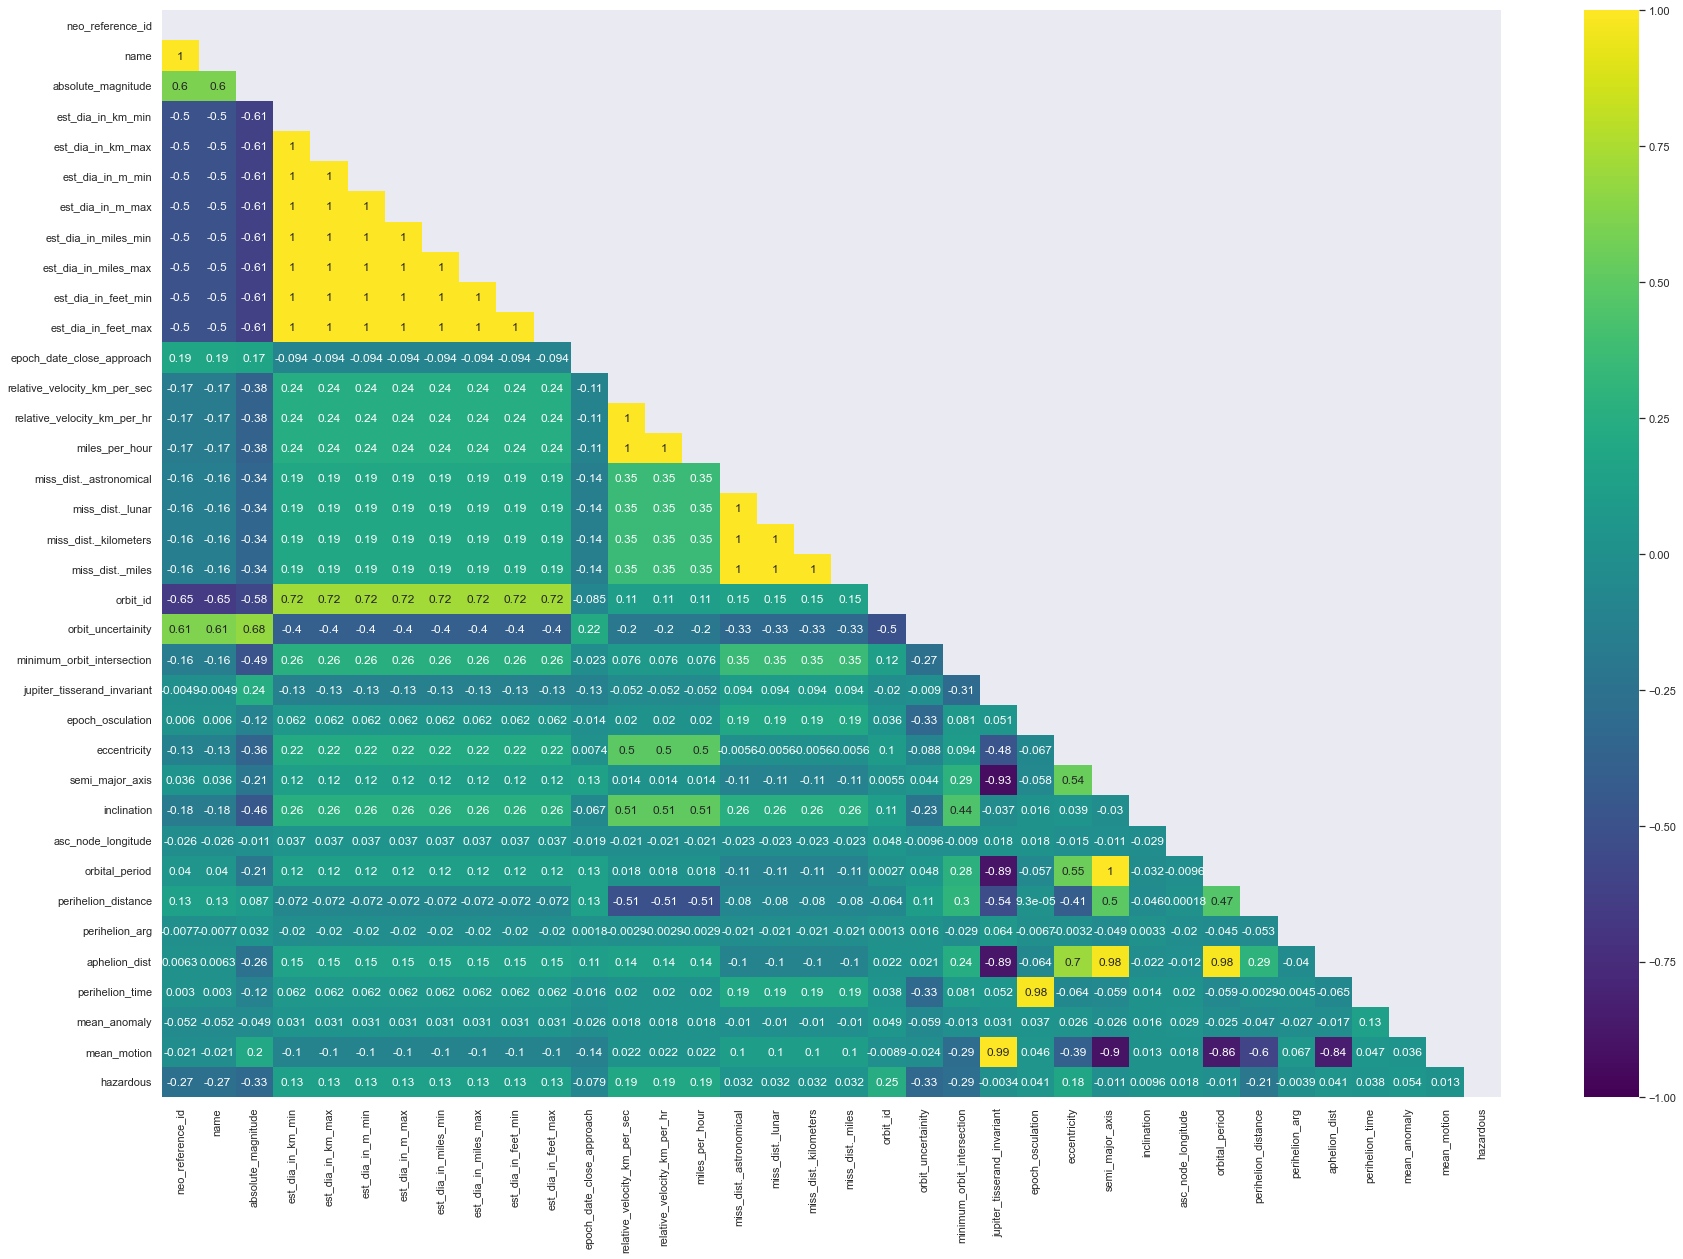

In [9]:
# check visually for feature correlation
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap='viridis', mask=np.triu(df_nasa.corr()), annot=True)
plt.show()
plt.close()

In [10]:
# Min and max estimated diameter are measured in several units such as km, m, miles, and feet, 
# so only 'est_dia_in_km_min' and 'est_dia_in_km_max' will be considered, but since those two are perfectly correlated,
# only 'est_dia_in_km_max' will be kept

# Relative velocity is measured in km/hour, km/sec and miles/hour, so only 'relative_velocity_km_per_hr' will be kept

# Miss distance is measured in astronomical, lunar, km, and miles, so only keep 'miss_dist._kilometers'

# Date features such as 'close_approach_date', 'epoch_date_close_approach', and 'orbit_determination_date' will
# be dropped because they do not contribute to the fact whether the asteroid will be hazardous or not.

In [11]:
df_nasa.head()

,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,est_dia_in_feet_max,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist._astronomical,miss_dist._lunar,miss_dist._kilometers,miss_dist._miles,orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [12]:
df_nasa.drop(['equinox', 'orbiting_body', 'name', 'neo_reference_id', 'est_dia_in_km_max', 'est_dia_in_m_min',
              'est_dia_in_m_max', 'est_dia_in_m_min', 'est_dia_in_m_max', 'est_dia_in_miles_min',
              'est_dia_in_miles_max', 'est_dia_in_feet_min', 'est_dia_in_feet_max', 'relative_velocity_km_per_sec',
              'miles_per_hour', 'close_approach_date', 'epoch_date_close_approach', 'orbit_determination_date',
              'miss_dist._astronomical', 'miss_dist._lunar', 'miss_dist._miles'], axis=1, inplace=True)

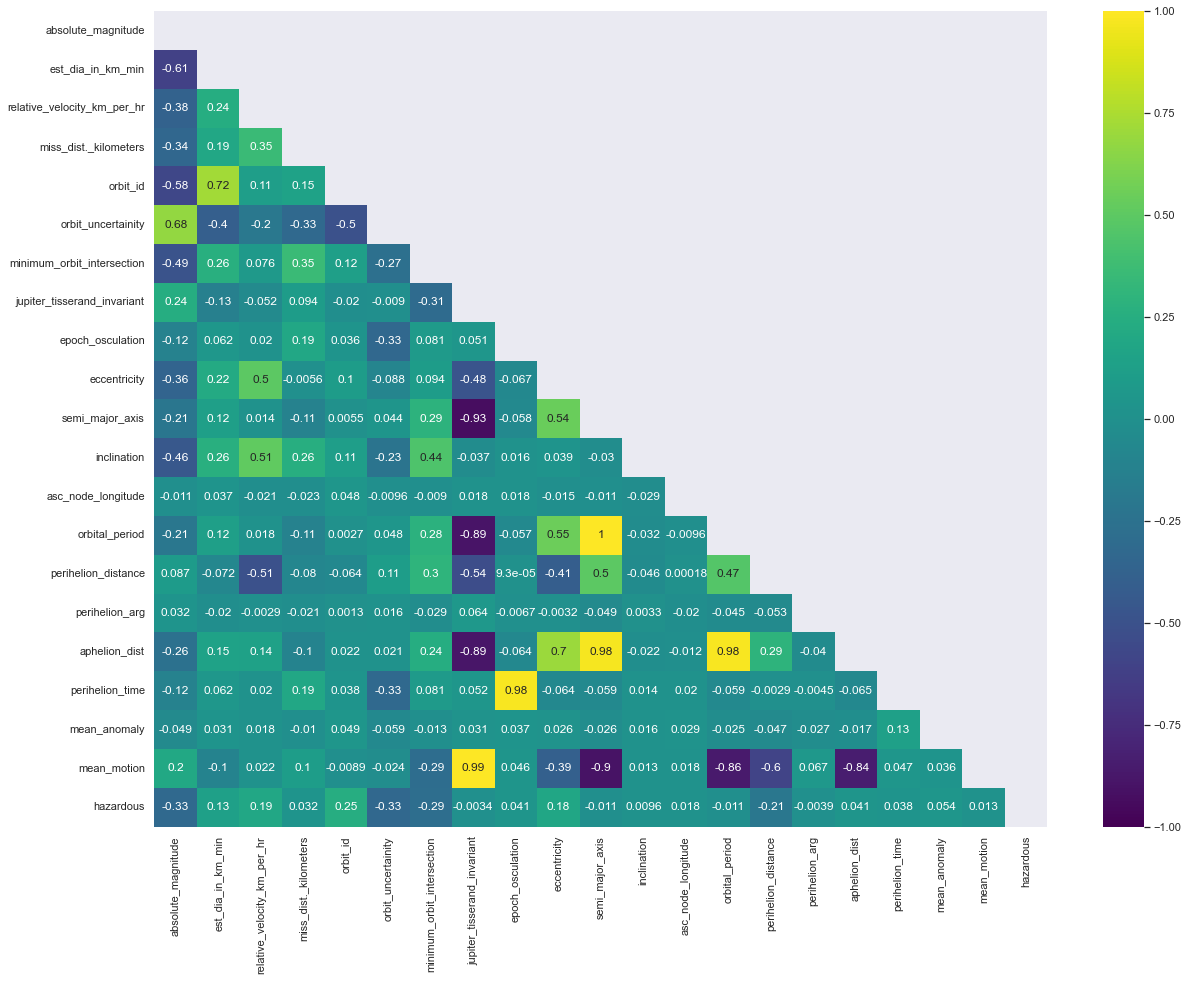

In [13]:
# plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap="viridis", mask=np.triu(df_nasa.corr()), annot=True)
plt.show()
plt.close()

In [14]:
df_nasa.head()

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,22017.003799,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,65210.346095,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,27326.560182,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,40225.948191,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,35426.991794,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [15]:
df_nasa.describe()

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,50294.919829,3.841347e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,26255.601377,2.181110e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,1207.814804,2.660989e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,30358.313370,1.995928e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,46504.401181,3.964771e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,65079.535405,5.746863e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,160681.487851,7.478160e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Outlier analysis

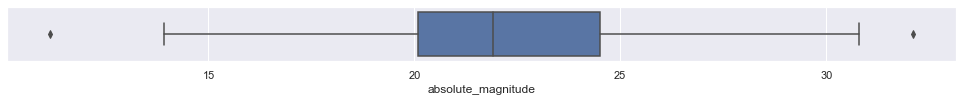

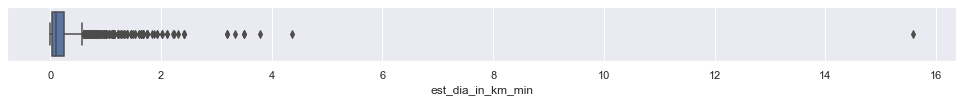

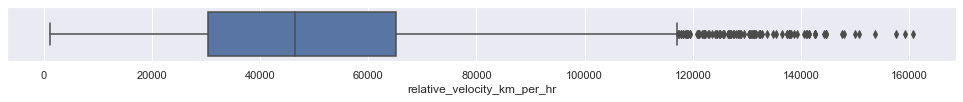

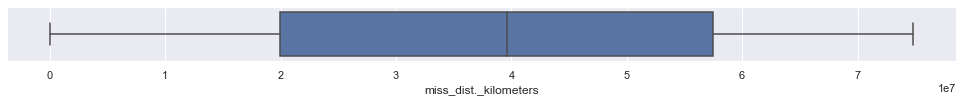

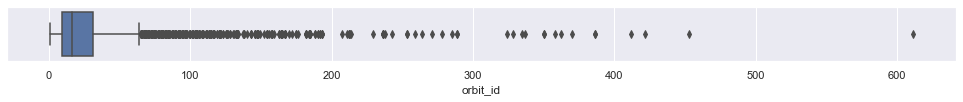

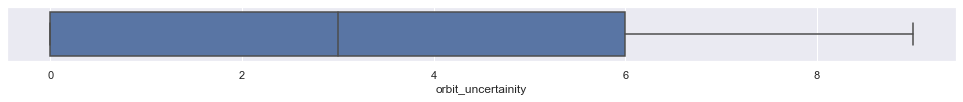

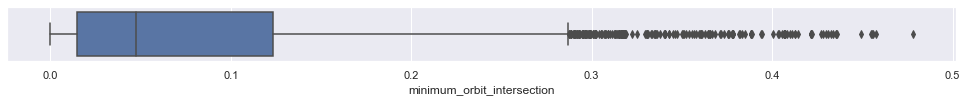

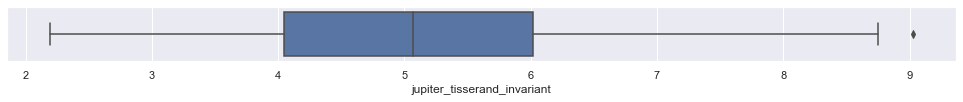

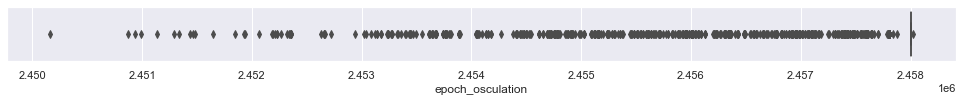

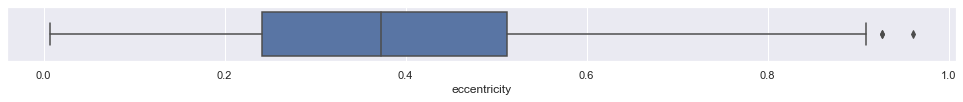

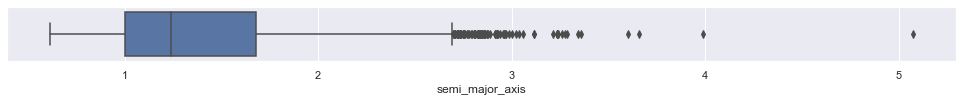

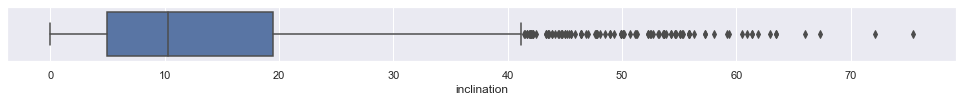

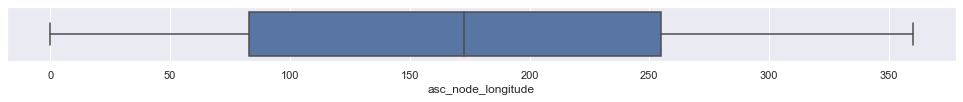

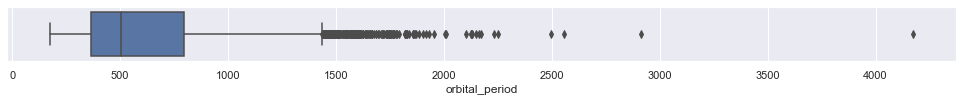

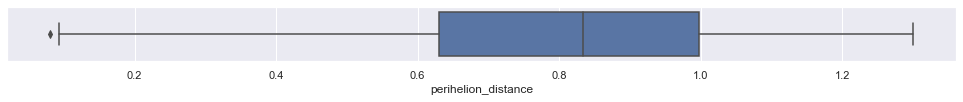

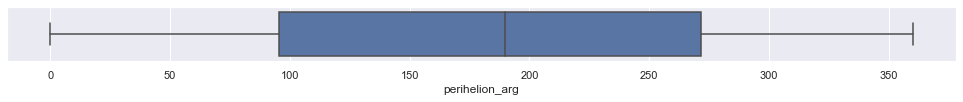

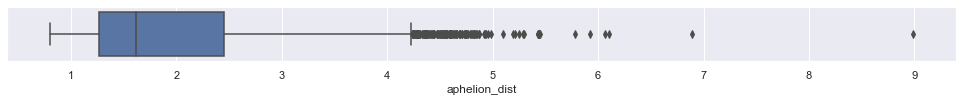

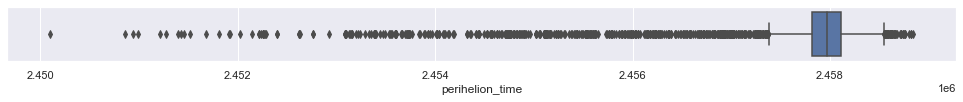

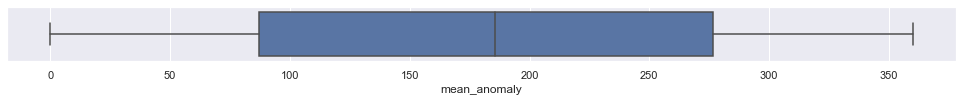

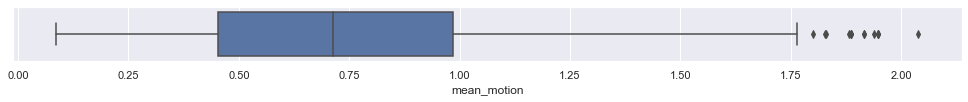

In [21]:
for column in df_nasa.iloc[:,:-1]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_nasa, x=column)

# Import processed data

In [8]:
# import processed data
with open('../data/processed/train_scaled.pkl', 'rb') as input_file:
            X_train_scaled, y_train_scaled = pickle.load(input_file)
with open('../data/processed/test_scaled.pkl', 'rb') as input_file:
            X_test_scaled, y_test_scaled = pickle.load(input_file)

In [9]:
print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

(3749, 19) (3749,)
(938, 19) (938,)


### Analysis of target variable for train and test set

In [22]:
# target variable distribution in train data
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[False  True] [3139  610]


In [24]:
# target variable distribution in test data
unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts)

[False  True] [793 145]


### PCA visualizations

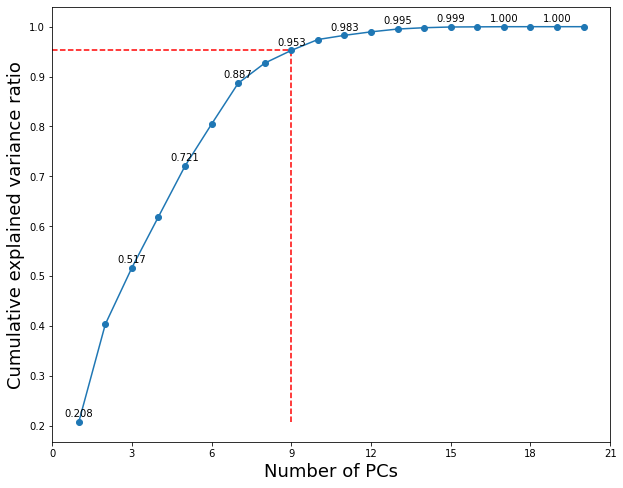

In [5]:
# perform pca
pca = PCA(n_components=20)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)

# plot cumulative explained variance vs. number of PCs
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
x_ticks = np.arange(1, 21)

fig = plt.figure(1, figsize=(10, 8))
ax = fig.gca()
ax.plot(x_ticks,cum_var_explained, 'o-')
# zip joins x and y coordinates in pairs
for i, (x,y) in enumerate(zip(x_ticks,cum_var_explained)):
    if i%2 == 0:
        label = "{:.3f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,5), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlim([0, 21])
plt.vlines(9, cum_var_explained[0], cum_var_explained[8], linestyle="dashed", colors='red')
plt.hlines(cum_var_explained[8], 0, 9, linestyle="dashed", colors='red')
plt.xlabel('Number of PCs', fontsize=18)
plt.ylabel('Cumulative explained variance ratio',  fontsize=18)
plt.savefig('../reports/plots/pca.png', dpi=300, bbox_inches='tight', facecolor = 'white')
plt.show()